# 3.6.2 Load Boston Dataset

In [2]:
%load_ext pycodestyle_magic
%flake8_on

In [3]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, scale

In [4]:
boston = pd.read_csv(r"Data/Boston.csv")
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [12]:
results = smf.ols("medv ~ lstat", data=boston).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           5.08e-88
Time:                        13:22:49   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
RSE = np.sqrt(np.sum(results.resid ** 2) / results.df_resid)
print(f"RSE: {RSE}")

RSE: 6.215760405398069


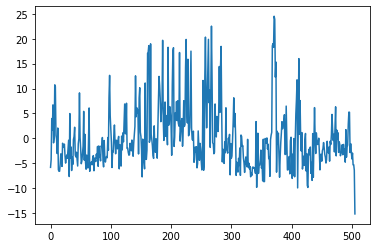

In [7]:
plt.plot(results.resid)

In [17]:
results.conf_int()

,0,1
Intercept,33.448457,35.659225
lstat,-1.026148,-0.873951


## Create Confidence(mean_ci) and prediction intervals(Obs_ci)


In the context of linear regression

- Confidence interval (mean_ci) at lstat = 5: if we calculated 100 of these intervals from different distribution of data, 95 of these intervals will have the population mean of the median price. Here population refers to all the cities that have lstat = 5


- Prediction interval (obs_ci_lower) at lstat = 5: if we calculate 100 of these intervals from different distributions of data, 95 of these intervals will have the  predicted median price within this interval for this lstat.

Note that confidence intervals are for the population mean and prediction interval are for a certain entitity

The below definition is in context of means, but also holds to linear regression coefficients too..

From graphpad

Confidence intervals tell you about how well you have determined the mean. Assume that the data really are randomly sampled from a Gaussian distribution. If you do this many times, and calculate a confidence interval of the mean from each sample, you'd expect about 95 % of those intervals to include the true value of the population mean. The key point is that the confidence interval tells you about the likely location of the true population parameter.

Prediction intervals tell you where you can expect to see the next data point sampled. Assume that the data really are randomly sampled from a Gaussian distribution. Collect a sample of data and calculate a prediction interval. Then sample one more value from the population. If you do this many times, you'd expect that next value to lie within that prediction interval in 95% of the samples.The key point is that the prediction interval tells you about the distribution of values, not the uncertainty in determining the population mean.

Prediction intervals must account for both the uncertainty in knowing the value of the population mean, plus data scatter. So a prediction interval is always wider than a confidence interval.

In [39]:
predictions = results.get_prediction(pd.DataFrame({"lstat": [5]}))
predictions.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513


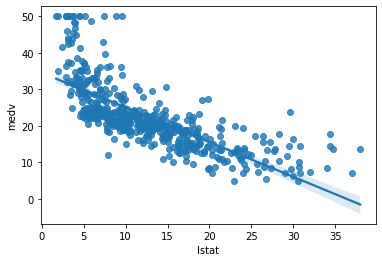

In [41]:
sns.regplot(boston["lstat"], boston["medv"])

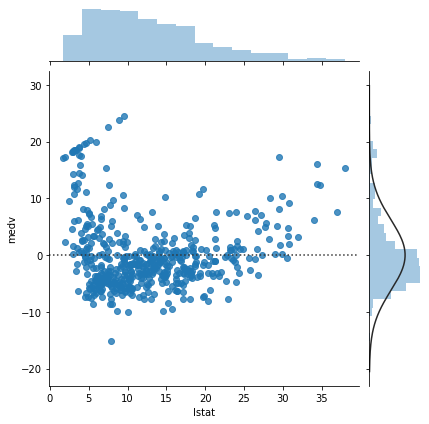

1:52: E251 unexpected spaces around keyword / parameter equals


In [44]:
sns.jointplot(boston["lstat"], boston["medv"], kind="resid")

## 3.6.6

In [52]:
carseats = pd.read_csv(r"Data/Carseats.csv", index_col=0)
carseats.info()

1:44: E231 missing whitespace after ','


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


In [63]:
all_x = carseats.columns.to_list()
all_x.remove("Sales")

In [71]:
results = smf.ols(
    "Sales ~ " + "+ ".join(all_x) + "+Income:Advertising + Price:Age", data=carseats
).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 20 Feb 2020   Prob (F-statistic):          6.14e-166
Time:                        16:07:09   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1:29: E225 missing whitespace around operator
1:80: E501 line too long (102 > 79 characters)


In [73]:
results.model.formula

'Sales ~ CompPrice+ Income+ Advertising+ Population+ Price+ ShelveLoc+ Age+ Education+ Urban+ US+Income:Advertising + Price:Age'

In [88]:
from patsy.contrasts import Treatment

levels = carseats["ShelveLoc"].unique()
contrast = Treatment(reference=0).code_without_intercept(levels=list(levels))
print(contrast.matrix)

[[0. 0.]
 [1. 0.]
 [0. 1.]]
